# Bank churn prediction

In this exercise we predict if the customers who have 0 bank balance will churn the bank in the possible future

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')


In [116]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [118]:
# checking if all the customers are unique
df.duplicated('CustomerId').sum()

np.int64(0)

In [119]:
df = df.set_index('CustomerId')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


## Encoding

In [121]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [122]:
df.replace({'Geography' : {'France' : 2, 'Germany' : 1, 'Spain' : 0}}, inplace = True)

C:\Users\siddh\AppData\Local\Temp\ipykernel_49000\3032765626.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography' : {'France' : 2, 'Germany' : 1, 'Spain' : 0}}, inplace = True)


In [123]:
df['Gender'].value_counts()


Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [124]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

C:\Users\siddh\AppData\Local\Temp\ipykernel_49000\1828585573.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)


In [125]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [126]:
df.replace({'Num Of Products' : {1: 0, 2: 1, 3: 1, 4: 1}}, inplace=True)

In [127]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [128]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [129]:
df.loc[df['Balance'] == 0, 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [130]:
df['Zero Balance'] = np.where(df['Balance'] > 0, 1, 0)

<Axes: >

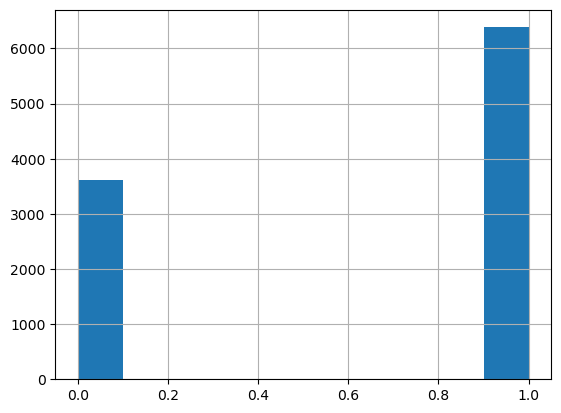

In [131]:
df['Zero Balance'].hist()

In [132]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

## Label and features

In [133]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [134]:
X = df.drop(['Surname', 'Churn'], axis = 1)
y = df['Churn']

In [135]:
X.shape, y.shape

((10000, 11), (10000,))

## Handling imbanalce data

In [136]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

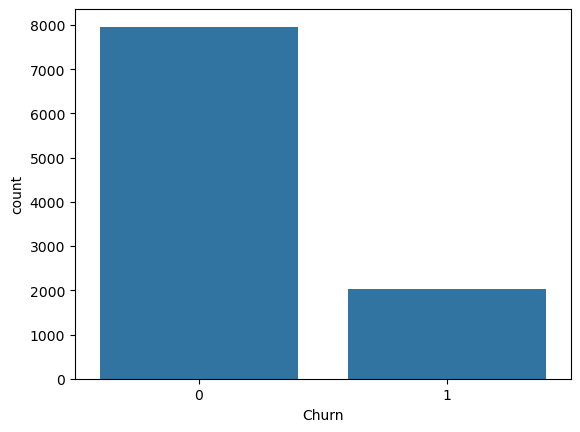

In [137]:
sns.countplot(x='Churn', data=df)

In [138]:
X.shape, y.shape

((10000, 11), (10000,))

## Random under sampling

In [139]:
from imblearn.under_sampling import RandomUnderSampler

In [140]:
rus = RandomUnderSampler(random_state=42)

In [141]:
X_rus, y_rus = rus.fit_resample(X, y)

In [142]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [143]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [144]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

In [145]:
X_rus.value_counts()

CreditScore  Geography  Gender  Age  Tenure  Balance    Num Of Products  Has Credit Card  Is Active Member  Estimated Salary  Zero Balance
850          2          1       62   1       124678.35  0                1                0                 70916.00          1               1
350          0          0       54   1       152677.48  0                1                1                 191973.49         1               1
             1          0       39   0       109733.20  1                0                0                 123602.11         1               1
             2          0       51   10      0.00       0                1                1                 125823.79         0               1
                        1       40   0       111098.85  0                1                1                 172321.21         1               1
                                                                                                                                             

<Axes: ylabel='Frequency'>

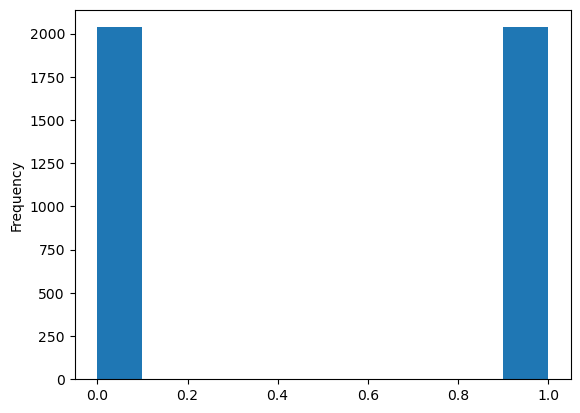

In [146]:
y_rus.plot(kind='hist')

## Random overe sampling

In [147]:
from imblearn.over_sampling import RandomOverSampler

In [148]:
ros = RandomOverSampler(random_state=42) 

In [149]:
X_ros, y_ros = ros.fit_resample(X, y)

In [150]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [151]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [152]:

y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

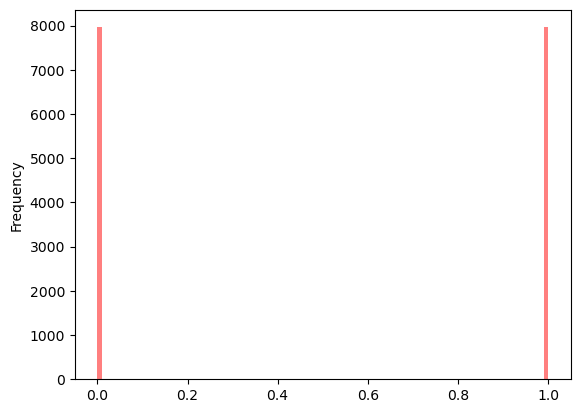

In [153]:
y_ros.plot(kind='hist', bins=100, color='red', alpha=0.5)

## Train test split

In [154]:
from sklearn.model_selection import train_test_split

Splitting original data

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Splitting random under sample data

In [156]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)   

Split random over sample data

In [157]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

## Standardize features

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
sc = StandardScaler()

standardize original data

In [160]:
X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Zero Balance'],
      dtype='object')

In [161]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [162]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

standardize random under sample data

In [163]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [164]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [165]:
X_train_rus

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15659366,1.599369,2,0,0.165004,-1.379689,0.380930,1,1,0,-1.126655,1
15658577,-0.215063,2,1,-0.398718,1.734715,0.278318,1,0,1,-1.295039,1
15729087,1.028537,1,0,1.198494,1.388670,1.210752,1,0,1,0.277113,1
15642041,0.783894,1,0,-0.116857,-1.379689,0.171742,1,1,0,-0.488123,1
15636684,0.783894,2,0,-0.680579,1.734715,-1.355229,1,1,1,1.701008,0
...,...,...,...,...,...,...,...,...,...,...,...
15607098,0.987763,0,1,-0.022903,0.004491,0.195857,1,1,0,1.636935,1
15581736,0.233448,1,0,0.540819,-1.379689,1.657298,1,0,1,-1.141169,1
15690440,0.060160,0,0,0.540819,-1.379689,-1.355229,1,1,1,1.689345,0


standardize random over sample data

In [166]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [167]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

## Model training Support vector classifier

### Raw data set

In [168]:
from sklearn.svm import SVC

In [169]:
svc = SVC()

In [170]:
svc.fit(X_train, y_train)

SVC()

In [171]:
y_pred = svc.predict(X_test)

Model accuracy with raw data set

In [172]:
from sklearn.metrics import confusion_matrix, classification_report

In [173]:
confusion_matrix(y_test, y_pred)

array([[2384,   32],
       [ 438,  146]])

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2416
           1       0.82      0.25      0.38       584

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



Hyperparameter tuning on the raw dataset

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf'],
    'class_weight':['balanced']
}

In [177]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv = 2)

In [178]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [179]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [180]:
grid_predictions = grid.predict(X_test)

In [181]:
confusion_matrix(y_test, grid_predictions)

array([[2022,  394],
       [ 253,  331]])

In [182]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2416
           1       0.46      0.57      0.51       584

    accuracy                           0.78      3000
   macro avg       0.67      0.70      0.68      3000
weighted avg       0.80      0.78      0.79      3000



### Model with random under sampling

In [183]:
svc_rus = SVC()

In [184]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [185]:
y_pred_rus = svc_rus.predict(X_test_rus)

Model accuracy

In [186]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[464, 176],
       [151, 432]])

In [187]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       640
           1       0.71      0.74      0.73       583

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



Hyperparameter Tuning

In [188]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf'],
    'class_weight':['balanced']
}

In [189]:
grid_rus = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv = 2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [190]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [191]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [192]:
confusion_matrix(y_test_rus, grid_predictions_rus)

array([[480, 160],
       [158, 425]])

In [193]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       640
           1       0.73      0.73      0.73       583

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



No significant difference even after hyperparameter tuning

### Model with random over samping

In [194]:
svc_ros = SVC()

In [195]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [196]:
y_pred_ros = svc_ros.predict(X_test_ros)

Model accuracy

In [197]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1825,  601],
       [ 556, 1796]])

In [198]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      2426
           1       0.75      0.76      0.76      2352

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



Hyperparameter Tuning

In [199]:
grid_ros = GridSearchCV(SVC(), param_grid, cv=2, verbose=2, refit=True)

In [200]:
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [201]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [202]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [203]:
confusion_matrix(y_test_ros, grid_predictions_ros)

array([[2076,  350],
       [  84, 2268]])

In [204]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2426
           1       0.87      0.96      0.91      2352

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



one of the highest accuracy